In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow import keras
import numpy as np
import math
import gc
import random
import time

RESHAPED = 1
NB_CLASSES = 1
DROPOUT = 0.3
N_HIDDEN = 512
BATCH_SIZE = 15
EPOCHS = 10
VERBOSE = 1
VALIDATION_SPLIT = 0.25
TOTAL_DATA_POINTS = 100
EXPONENT = 2

counts = [1000., 10.]
# Probability of success.
probs = [.99]

#Want to make the schuffle happen the same way every time
tf.random.set_seed(5)
tf.random.shuffle(tf.range(5))


def get_dataset():
    rng = tf.random.Generator.from_seed(seed=234)
    randomNumbers = rng.truncated_normal(shape=[TOTAL_DATA_POINTS], mean=0.5, stddev=.05)
    return randomNumbers

random_dataset = get_dataset()
            
def convert_to_train_test_data(dataset, test_percent = 0.15):
    point_number = []
    total_independent = []
    total_dependent = []
    count = 1
    for i in range(1, TOTAL_DATA_POINTS):
        point_number.append(i)
    random.shuffle(point_number)
    
    for i in point_number:
        if (int(i/10) == i/10):
            total_dependent.append(-1000) 
        else:
            total_dependent.append((i ** EXPONENT) * dataset[i])
        total_independent.append(i ** EXPONENT)
            
    testRecordCount = int(round(test_percent*len(total_independent)))
    return point_number[testRecordCount:], total_independent[testRecordCount:], total_dependent[testRecordCount:], point_number[:testRecordCount], total_independent[:testRecordCount], total_dependent[:testRecordCount]
    
x_train, x_train_modified, y_train, x_test, x_test_modified, y_test = convert_to_train_test_data(random_dataset, test_percent=0.15)


def createModel(activationFunction):
    #Switch to a learning_rate of 0.001 to see MSLE get "stuck"
    opt = keras.optimizers.RMSprop(learning_rate=0.0001)

    model = tf.keras.models.Sequential()
    model.add(tf.keras.layers.Input(shape=(RESHAPED,)))
    model.add(keras.layers.Dense(N_HIDDEN, name='hidden_dense_layer_1', activation=activationFunction))
    model.add(keras.layers.Dropout(DROPOUT))
    model.add(keras.layers.Dense(N_HIDDEN, name='hidden_dense_layer_2', activation=activationFunction))
    model.add(keras.layers.Dropout(DROPOUT))
    model.add(keras.layers.Dense(NB_CLASSES, name='output_dense_layer'))
    model.compile(optimizer=opt, loss='MSE', metrics=['accuracy'])
    
    return model
    
def displayResults(history):
    train_loss = history.history['loss']
    validation_loss = history.history['val_loss']

    epochs = range(1, len(validation_loss)+1)

    fig, ax = plt.subplots()  # Create a figure and an axes.
    ax.plot(epochs, train_loss, label='train loss')
    ax.plot(epochs, validation_loss, label='validation loss')
    ax.set_xlabel('epoch')  # Add an x-label to the axes.
    ax.set_ylabel('loss')  # Add a y-label to the axes.
    ax.set_title("Simple Plot")  # Add a title to the axes.
    ax.legend() 

def showPrediction(model, x_train, x_train_modified, y_train, x_test, x_test_modified, y_test):
    NEXT_POINT = TOTAL_DATA_POINTS + 1
    FUTURE_INDEPENDANT = [NEXT_POINT ** EXPONENT]
    FUTURE_DEPENDANT = []

    PREDICTED_INDEPENDANT = []
    PREDICTED_DEPENDANT = []

    pred_traning = model.predict(np.array(x_train_modified))

    count = 0
    for deaths in pred_traning:
        PREDICTED_INDEPENDANT.append(x_train[count])
        PREDICTED_DEPENDANT.append(deaths)
        count += 1

    pred_validation = model.predict(np.array(x_test_modified))

    count = 0
    for deaths in pred_validation:
        PREDICTED_INDEPENDANT.append(x_test[count])
        PREDICTED_DEPENDANT.append(deaths)
        count += 1

    pred_dependant = model.predict(FUTURE_INDEPENDANT)

    for item in pred_dependant:
        FUTURE_DEPENDANT.append(item)
    
    print(FUTURE_DEPENDANT)
    fig, ax = plt.subplots()  # Create a figure and an axes.
    ax.plot(x_train, y_train, label='training data', linewidth=0, marker='.')
    ax.plot(x_test, y_test, label='test data', linewidth=0, marker='.')
    ax.plot(PREDICTED_INDEPENDANT, PREDICTED_DEPENDANT, label='prediction values', linewidth=0, marker='.')
    ax.plot([NEXT_POINT], FUTURE_DEPENDANT, label='future prediction', linewidth=0, marker='.')
    ax.set_xlabel('independent')  # Add an x-label to the axes.
    ax.set_ylabel('dependant')  # Add a y-label to the axes.
    ax.legend() 
    
print('done')

done


Epoch 1/10
5/5 [==============================] - 0s 43ms/step - loss: 4356958.0000 - accuracy: 0.0000e+00 - val_loss: 7132182.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 0s 12ms/step - loss: 4353147.0000 - accuracy: 0.0000e+00 - val_loss: 7127780.5000 - val_accuracy: 0.0000e+00
Epoch 3/10
5/5 [==============================] - 0s 25ms/step - loss: 4350323.0000 - accuracy: 0.0000e+00 - val_loss: 7124666.5000 - val_accuracy: 0.0000e+00
Epoch 4/10
5/5 [==============================] - 0s 14ms/step - loss: 4348451.0000 - accuracy: 0.0000e+00 - val_loss: 7121844.0000 - val_accuracy: 0.0000e+00
Epoch 5/10
5/5 [==============================] - 0s 14ms/step - loss: 4346472.0000 - accuracy: 0.0000e+00 - val_loss: 7119469.5000 - val_accuracy: 0.0000e+00
Epoch 6/10
5/5 [==============================] - 0s 15ms/step - loss: 4343945.0000 - accuracy: 0.0000e+00 - val_loss: 7116539.5000 - val_accuracy: 0.0000e+00
Epoch 7/10
5/5 [==============================

2809

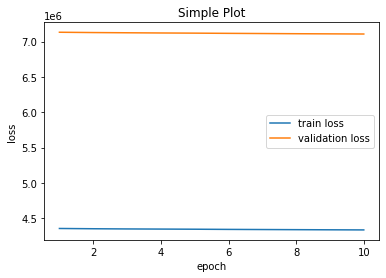

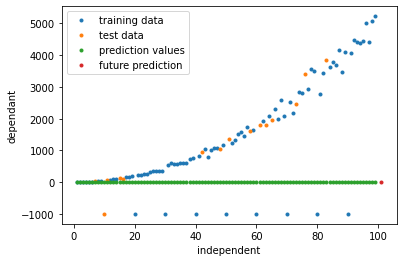

In [2]:
tf.random.set_seed(1234)
np.random.seed(0)

model = createModel('sigmoid')

startTime = time.clock()
history = model.fit(np.array(x_train_modified), np.array(y_train), batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


test_loss, test_acc = model.evaluate(np.array(x_test_modified), np.array(y_test))
elapsedTime = time.clock() - startTime
print()
print('Test accuracy:', test_acc)

print("Time elapsed in seconds: ", elapsedTime)

displayResults(history)

showPrediction(model, x_train, x_train_modified, y_train, x_test, x_test_modified, y_test)

del model
tf.keras.backend.clear_session()

gc.collect()

Epoch 1/10
5/5 [==============================] - 0s 28ms/step - loss: 4361105.0000 - accuracy: 0.0000e+00 - val_loss: 7141470.5000 - val_accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 0s 12ms/step - loss: 4361100.0000 - accuracy: 0.0000e+00 - val_loss: 7141465.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
5/5 [==============================] - 0s 13ms/step - loss: 4361095.0000 - accuracy: 0.0000e+00 - val_loss: 7141462.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
5/5 [==============================] - 0s 13ms/step - loss: 4361095.0000 - accuracy: 0.0000e+00 - val_loss: 7141458.5000 - val_accuracy: 0.0000e+00
Epoch 5/10
5/5 [==============================] - 0s 13ms/step - loss: 4361091.5000 - accuracy: 0.0000e+00 - val_loss: 7141455.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
5/5 [==============================] - 0s 14ms/step - loss: 4361087.0000 - accuracy: 0.0000e+00 - val_loss: 7141451.5000 - val_accuracy: 0.0000e+00
Epoch 7/10
5/5 [==============================

18809

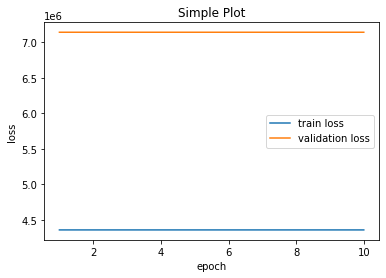

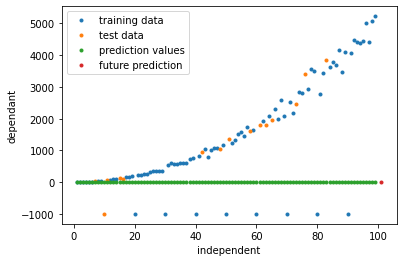

In [3]:
tf.random.set_seed(1234)
np.random.seed(0)

model = createModel('softmax')

startTime = time.clock()
history = model.fit(np.array(x_train_modified), np.array(y_train), batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


test_loss, test_acc = model.evaluate(np.array(x_test_modified), np.array(y_test))
elapsedTime = time.clock() - startTime
print()
print('Test accuracy:', test_acc)

print("Time elapsed in seconds: ", elapsedTime)

displayResults(history)

showPrediction(model, x_train, x_train_modified, y_train, x_test, x_test_modified, y_test)

del model
tf.keras.backend.clear_session()

gc.collect()

Epoch 1/10
5/5 [==============================] - 0s 27ms/step - loss: 4352567.5000 - accuracy: 0.0000e+00 - val_loss: 7110566.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 0s 12ms/step - loss: 4336469.5000 - accuracy: 0.0000e+00 - val_loss: 7092580.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
5/5 [==============================] - 0s 12ms/step - loss: 4326080.0000 - accuracy: 0.0000e+00 - val_loss: 7081136.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
5/5 [==============================] - 0s 12ms/step - loss: 4318249.0000 - accuracy: 0.0000e+00 - val_loss: 7072149.5000 - val_accuracy: 0.0000e+00
Epoch 5/10
5/5 [==============================] - 0s 14ms/step - loss: 4312452.5000 - accuracy: 0.0000e+00 - val_loss: 7065297.5000 - val_accuracy: 0.0000e+00
Epoch 6/10
5/5 [==============================] - 0s 13ms/step - loss: 4307451.5000 - accuracy: 0.0000e+00 - val_loss: 7058145.5000 - val_accuracy: 0.0000e+00
Epoch 7/10
5/5 [==============================

18984

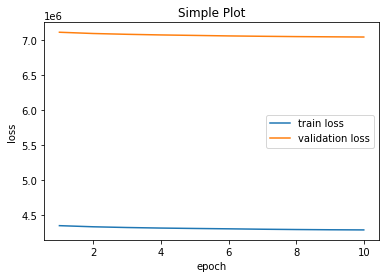

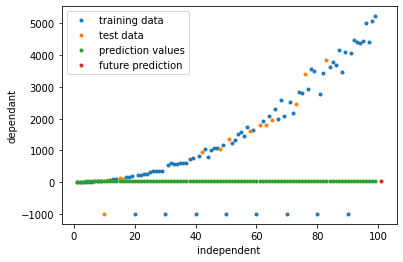

In [4]:
tf.random.set_seed(1234)
np.random.seed(0)

model = createModel('tanh')

startTime = time.clock()
history = model.fit(np.array(x_train_modified), np.array(y_train), batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


test_loss, test_acc = model.evaluate(np.array(x_test_modified), np.array(y_test))
elapsedTime = time.clock() - startTime
print()
print('Test accuracy:', test_acc)

print("Time elapsed in seconds: ", elapsedTime)

displayResults(history)

showPrediction(model, x_train, x_train_modified, y_train, x_test, x_test_modified, y_test)

del model
tf.keras.backend.clear_session()

gc.collect()

Epoch 1/10
5/5 [==============================] - 0s 27ms/step - loss: 3670193.7500 - accuracy: 0.0000e+00 - val_loss: 3349672.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 0s 12ms/step - loss: 2068521.2500 - accuracy: 0.0000e+00 - val_loss: 1925246.5000 - val_accuracy: 0.0000e+00
Epoch 3/10
5/5 [==============================] - 0s 12ms/step - loss: 1678855.0000 - accuracy: 0.0000e+00 - val_loss: 1243681.5000 - val_accuracy: 0.0000e+00
Epoch 4/10
5/5 [==============================] - 0s 13ms/step - loss: 1200664.7500 - accuracy: 0.0000e+00 - val_loss: 862277.6250 - val_accuracy: 0.0000e+00
Epoch 5/10
5/5 [==============================] - 0s 12ms/step - loss: 1234917.0000 - accuracy: 0.0000e+00 - val_loss: 775853.1875 - val_accuracy: 0.0000e+00
Epoch 6/10
5/5 [==============================] - 0s 12ms/step - loss: 1144206.1250 - accuracy: 0.0000e+00 - val_loss: 538392.3750 - val_accuracy: 0.0000e+00
Epoch 7/10
5/5 [==============================] -

18812

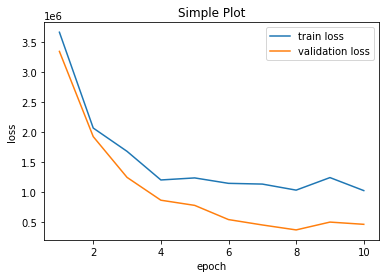

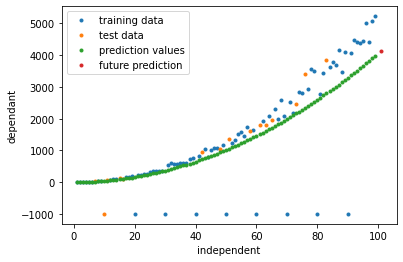

In [5]:
tf.random.set_seed(1234)
np.random.seed(0)

model = createModel('relu')

startTime = time.clock()
history = model.fit(np.array(x_train_modified), np.array(y_train), batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


test_loss, test_acc = model.evaluate(np.array(x_test_modified), np.array(y_test))
elapsedTime = time.clock() - startTime
print()
print('Test accuracy:', test_acc)

print("Time elapsed in seconds: ", elapsedTime)

displayResults(history)

showPrediction(model, x_train, x_train_modified, y_train, x_test, x_test_modified, y_test)

del model
tf.keras.backend.clear_session()

gc.collect()

Epoch 1/10
5/5 [==============================] - 0s 23ms/step - loss: 3445326.0000 - accuracy: 0.0000e+00 - val_loss: 2341877.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 0s 11ms/step - loss: 1645879.3750 - accuracy: 0.0000e+00 - val_loss: 1037005.6250 - val_accuracy: 0.0000e+00
Epoch 3/10
5/5 [==============================] - 0s 10ms/step - loss: 1413293.1250 - accuracy: 0.0000e+00 - val_loss: 585615.1250 - val_accuracy: 0.0000e+00
Epoch 4/10
5/5 [==============================] - 0s 12ms/step - loss: 1012149.8750 - accuracy: 0.0000e+00 - val_loss: 446012.2812 - val_accuracy: 0.0000e+00
Epoch 5/10
5/5 [==============================] - 0s 12ms/step - loss: 1155815.8750 - accuracy: 0.0000e+00 - val_loss: 548891.8125 - val_accuracy: 0.0000e+00
Epoch 6/10
5/5 [==============================] - 0s 12ms/step - loss: 1107106.1250 - accuracy: 0.0000e+00 - val_loss: 392457.2500 - val_accuracy: 0.0000e+00
Epoch 7/10
5/5 [==============================] - 

18870

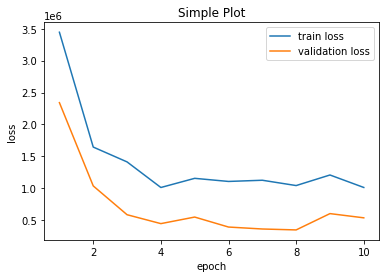

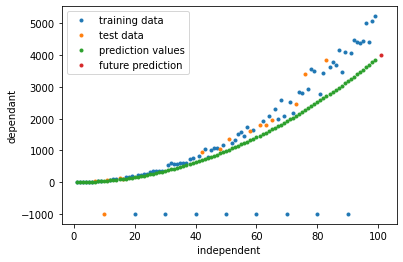

In [6]:
tf.random.set_seed(1234)
np.random.seed(0)

model = createModel(tf.nn.leaky_relu)

startTime = time.clock()
history = model.fit(np.array(x_train_modified), np.array(y_train), batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


test_loss, test_acc = model.evaluate(np.array(x_test_modified), np.array(y_test))
elapsedTime = time.clock() - startTime
print()
print('Test accuracy:', test_acc)

print("Time elapsed in seconds: ", elapsedTime)

displayResults(history)

showPrediction(model, x_train, x_train_modified, y_train, x_test, x_test_modified, y_test)

del model
tf.keras.backend.clear_session()

gc.collect()

Epoch 1/10
5/5 [==============================] - 0s 24ms/step - loss: 4336328.5000 - accuracy: 0.0000e+00 - val_loss: 7073617.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 0s 12ms/step - loss: 4304252.5000 - accuracy: 0.0000e+00 - val_loss: 7033917.5000 - val_accuracy: 0.0000e+00
Epoch 3/10
5/5 [==============================] - 0s 12ms/step - loss: 4283161.5000 - accuracy: 0.0000e+00 - val_loss: 7005888.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
5/5 [==============================] - 0s 11ms/step - loss: 4266313.0000 - accuracy: 0.0000e+00 - val_loss: 6980634.5000 - val_accuracy: 0.0000e+00
Epoch 5/10
5/5 [==============================] - 0s 13ms/step - loss: 4254636.0000 - accuracy: 0.0000e+00 - val_loss: 6958766.5000 - val_accuracy: 0.0000e+00
Epoch 6/10
5/5 [==============================] - 0s 13ms/step - loss: 4236262.5000 - accuracy: 0.0000e+00 - val_loss: 6934642.5000 - val_accuracy: 0.0000e+00
Epoch 7/10
5/5 [==============================

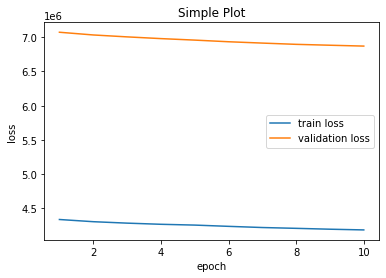

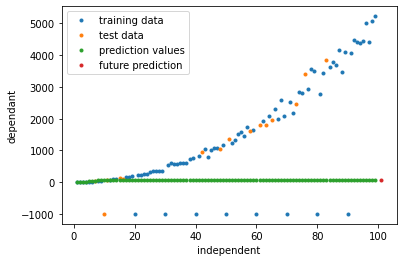

In [10]:
tf.random.set_seed(1234)
np.random.seed(0)

model = createModel(tf.nn.relu6)

startTime = time.clock()
history = model.fit(np.array(x_train_modified), np.array(y_train), batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


test_loss, test_acc = model.evaluate(np.array(x_test_modified), np.array(y_test))
elapsedTime = time.clock() - startTime
print()
print('Test accuracy:', test_acc)

print("Time elapsed in seconds: ", elapsedTime)

displayResults(history)

showPrediction(model, x_train, x_train_modified, y_train, x_test, x_test_modified, y_test)

del model
tf.keras.backend.clear_session()

(84,)
(84,)
Epoch 1/10
5/5 [==============================] - 0s 26ms/step - loss: 3680202.2500 - accuracy: 0.0000e+00 - val_loss: 3352048.0000 - val_accuracy: 0.0000e+00
Epoch 2/10
5/5 [==============================] - 0s 12ms/step - loss: 2083746.7500 - accuracy: 0.0000e+00 - val_loss: 1925967.0000 - val_accuracy: 0.0000e+00
Epoch 3/10
5/5 [==============================] - 0s 14ms/step - loss: 1695664.3750 - accuracy: 0.0000e+00 - val_loss: 1238643.0000 - val_accuracy: 0.0000e+00
Epoch 4/10
5/5 [==============================] - 0s 13ms/step - loss: 1210663.0000 - accuracy: 0.0000e+00 - val_loss: 854825.1250 - val_accuracy: 0.0000e+00
Epoch 5/10
5/5 [==============================] - 0s 13ms/step - loss: 1240059.6250 - accuracy: 0.0000e+00 - val_loss: 766562.0000 - val_accuracy: 0.0000e+00
Epoch 6/10
5/5 [==============================] - 0s 14ms/step - loss: 1152559.2500 - accuracy: 0.0000e+00 - val_loss: 530328.1250 - val_accuracy: 0.0000e+00
Epoch 7/10
5/5 [=====================

24679

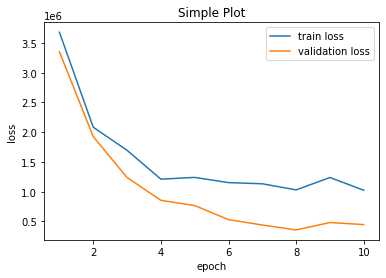

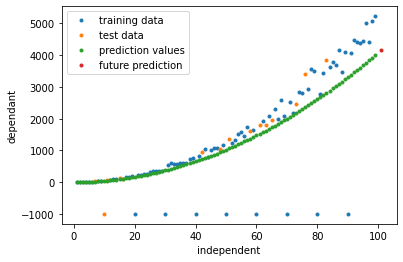

In [8]:
tf.random.set_seed(1234)
np.random.seed(0)
    
    
print(np.array(x_train).shape)
print(np.array(y_train).shape)

model = createModel(tf.nn.swish)

startTime = time.clock()
history = model.fit(np.array(x_train_modified), np.array(y_train), batch_size=BATCH_SIZE, epochs=EPOCHS, verbose=VERBOSE, validation_split=VALIDATION_SPLIT)


test_loss, test_acc = model.evaluate(np.array(x_test_modified), np.array(y_test))
elapsedTime = time.clock() - startTime
print()
print('Test accuracy:', test_acc)

print("Time elapsed in seconds: ", elapsedTime)

displayResults(history)

showPrediction(model, x_train, x_train_modified, y_train, x_test, x_test_modified, y_test)

del model
tf.keras.backend.clear_session()

gc.collect()